<a href="https://colab.research.google.com/github/sam505/Jupyter_notebook/blob/master/One.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

import datetime as dt
import pandas_datareader.data as web
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from scipy.optimize import minimize
from scipy import stats
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
stock_list = ['AAPL', 'XOM', 'C', 'TGT', 'F']

In [ ]:
start = dt.datetime(2000,1,1)
end = dt.datetime(2019,12,31)

data = pd.DataFrame()
for ticker in stock_list:
    data[ticker] = web.DataReader(ticker, 'yahoo', start, end)['Adj Close'].pct_change()
    
data.head()

,AAPL,XOM,C,TGT,F
Date,,,,,
2000-01-03,NaN,NaN,NaN,NaN,NaN
2000-01-04,-0.084310,-0.019154,-0.061321,-0.043364,-0.033413
2000-01-05,0.014633,0.054516,0.040201,-0.022666,0.003703
2000-01-06,-0.086538,0.051698,0.048309,-0.047310,0.001230
2000-01-07,0.047369,-0.002935,-0.004608,0.051607,0.073710


In [ ]:
data.tail()

,AAPL,XOM,C,TGT,F
Date,,,,,
2019-12-24,0.000951,-0.003841,-0.002159,0.001636,0.003178
2019-12-26,0.019840,0.001571,0.015778,0.002645,-0.002112
2019-12-27,-0.000380,-0.003422,-0.002004,0.002483,-0.009524
2019-12-30,0.005935,-0.005866,-0.002008,-0.002477,-0.011752
2019-12-31,0.007307,0.004318,0.004779,-0.005276,0.005405


In [ ]:
data_mon = data.resample(rule='M').apply(lambda x: ((1+x).cumprod()-1).tail(1))
data_mon.head()

,AAPL,XOM,C,TGT,F
Date,,,,,
2000-01-31,-0.073144,0.058260,0.075471,-0.085863,-0.040513
2000-02-29,0.104820,-0.086158,-0.089583,-0.102961,-0.163316
2000-03-31,0.184842,0.035685,0.157005,0.266949,0.103604
2000-04-30,-0.086517,-0.004006,-0.012085,-0.109532,0.202746
2000-05-31,-0.322922,0.078226,0.054025,-0.056896,-0.113014


In [ ]:
three_factors = web.DataReader('F-F_Research_Data_Factors', 'famafrench', start, end)[0]
mom_factor = web.DataReader('F-F_Momentum_Factor', 'famafrench', start, end)[0]
mom_factor.columns = ['MOM']
ff_factors = pd.concat([three_factors, mom_factor], axis=1)

ff_factors = ff_factors.apply(lambda x:x/100)
ff_factors.index = ff_factors.index.to_timestamp(how='end').normalize()

ff_factors.head()

,Mkt-RF,SMB,HML,RF,MOM
Date,,,,,
2000-01-31,-0.0474,0.0570,-0.0175,0.0041,0.0186
2000-02-29,0.0245,0.2119,-0.0894,0.0043,0.1836
2000-03-31,0.0520,-0.1682,0.0766,0.0047,-0.0639
2000-04-30,-0.0640,-0.0693,0.0741,0.0046,-0.0857
2000-05-31,-0.0442,-0.0633,0.0501,0.0050,-0.0908


In [ ]:
data_mon = data_mon.join(ff_factors)
data_mon.head()

,AAPL,XOM,C,TGT,F,Mkt-RF,SMB,HML,RF,MOM
Date,,,,,,,,,,
2000-01-31,-0.073144,0.058260,0.075471,-0.085863,-0.040513,-0.0474,0.0570,-0.0175,0.0041,0.0186
2000-02-29,0.104820,-0.086158,-0.089583,-0.102961,-0.163316,0.0245,0.2119,-0.0894,0.0043,0.1836
2000-03-31,0.184842,0.035685,0.157005,0.266949,0.103604,0.0520,-0.1682,0.0766,0.0047,-0.0639
2000-04-30,-0.086517,-0.004006,-0.012085,-0.109532,0.202746,-0.0640,-0.0693,0.0741,0.0046,-0.0857
2000-05-31,-0.322922,0.078226,0.054025,-0.056896,-0.113014,-0.0442,-0.0633,0.0501,0.0050,-0.0908


In [ ]:
data_mon.loc[(2000 <= data_mon.index.year) & (data_mon.index.year <= 2009), 'Decade'] = 1
data_mon.loc[(2010 <= data_mon.index.year) & (data_mon.index.year <= 2019), 'Decade'] = 2
data_mon.head()

,AAPL,XOM,C,TGT,F,Mkt-RF,SMB,HML,RF,MOM,Decade
Date,,,,,,,,,,,
2000-01-31,-0.073144,0.058260,0.075471,-0.085863,-0.040513,-0.0474,0.0570,-0.0175,0.0041,0.0186,1.0
2000-02-29,0.104820,-0.086158,-0.089583,-0.102961,-0.163316,0.0245,0.2119,-0.0894,0.0043,0.1836,1.0
2000-03-31,0.184842,0.035685,0.157005,0.266949,0.103604,0.0520,-0.1682,0.0766,0.0047,-0.0639,1.0
2000-04-30,-0.086517,-0.004006,-0.012085,-0.109532,0.202746,-0.0640,-0.0693,0.0741,0.0046,-0.0857,1.0
2000-05-31,-0.322922,0.078226,0.054025,-0.056896,-0.113014,-0.0442,-0.0633,0.0501,0.0050,-0.0908,1.0




*   List item
*   List item



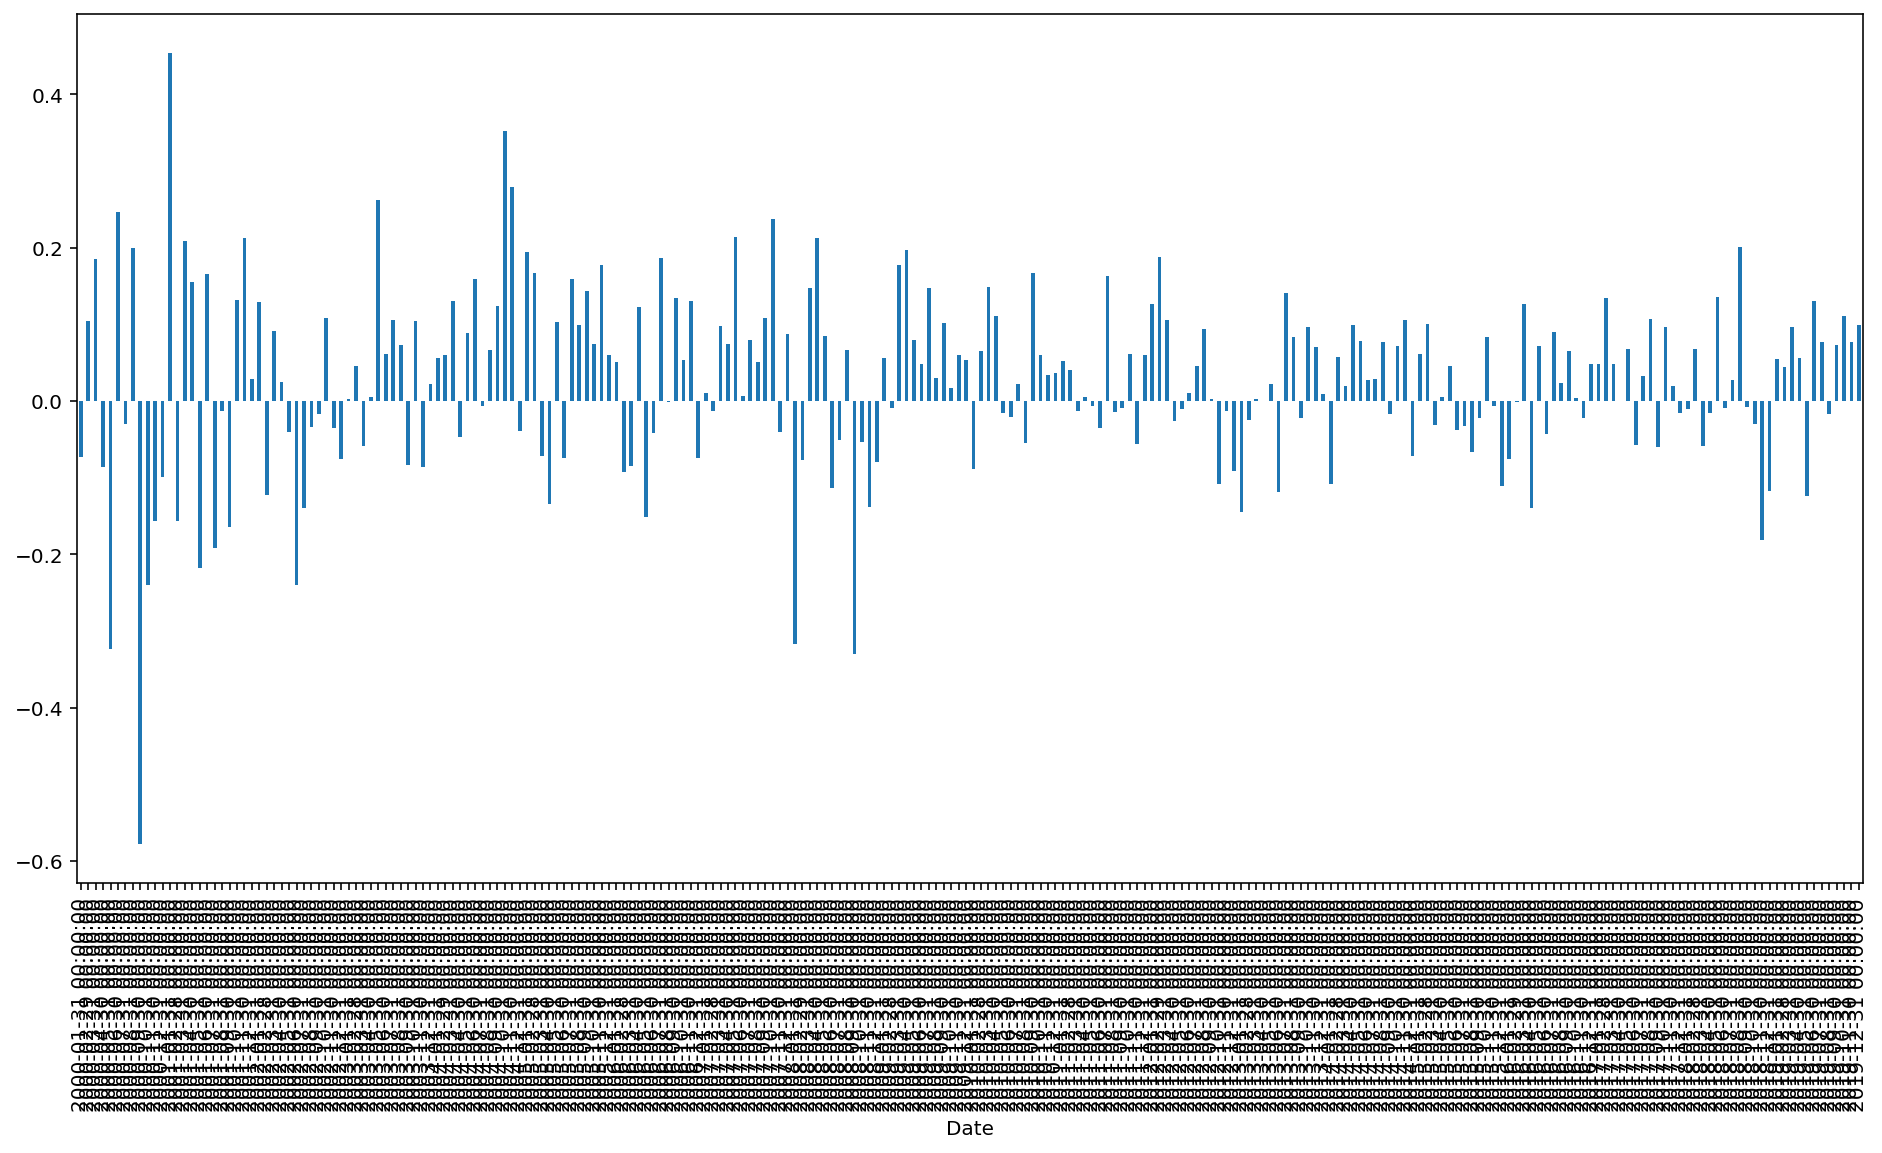

In [ ]:
data_mon['AAPL'].plot.bar(figsize=(16,8));

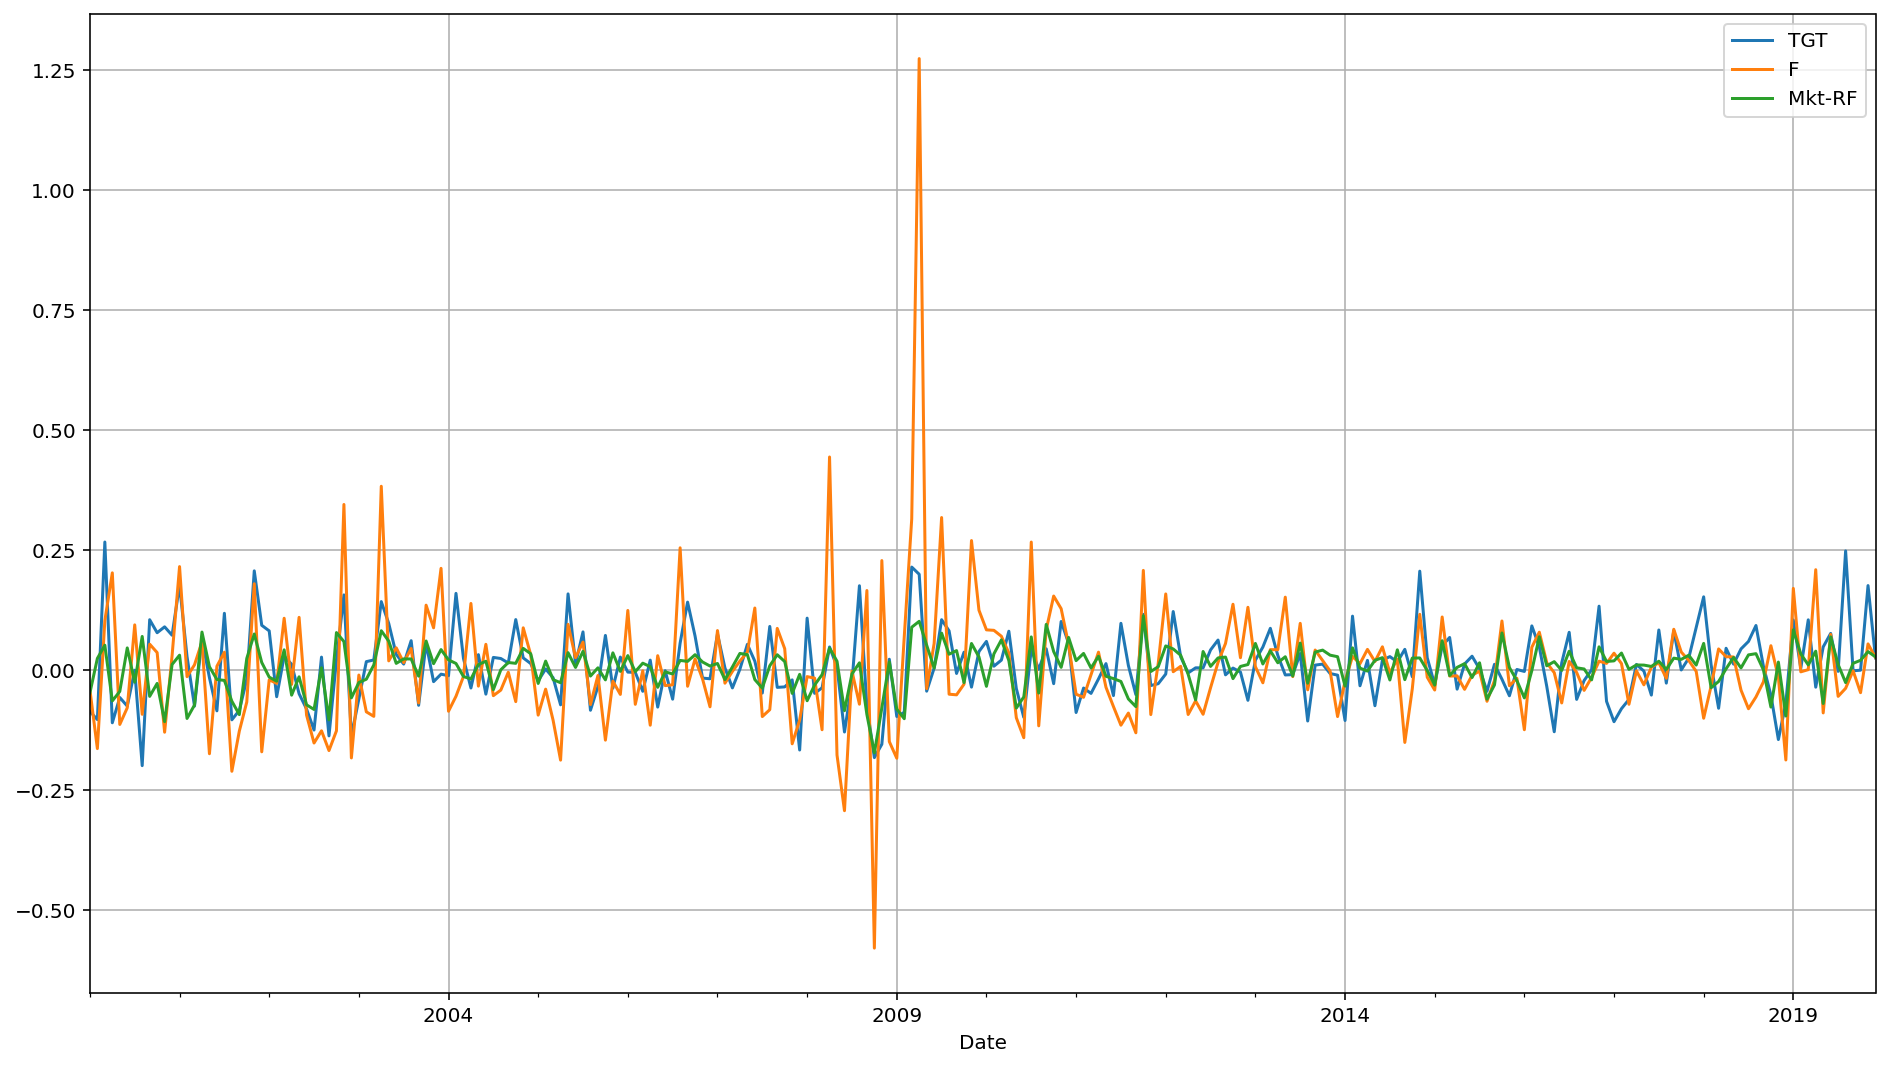

In [ ]:
data_mon.plot.line(y=['TGT',	'F',	'Mkt-RF'], figsize=(16,9), grid=True);

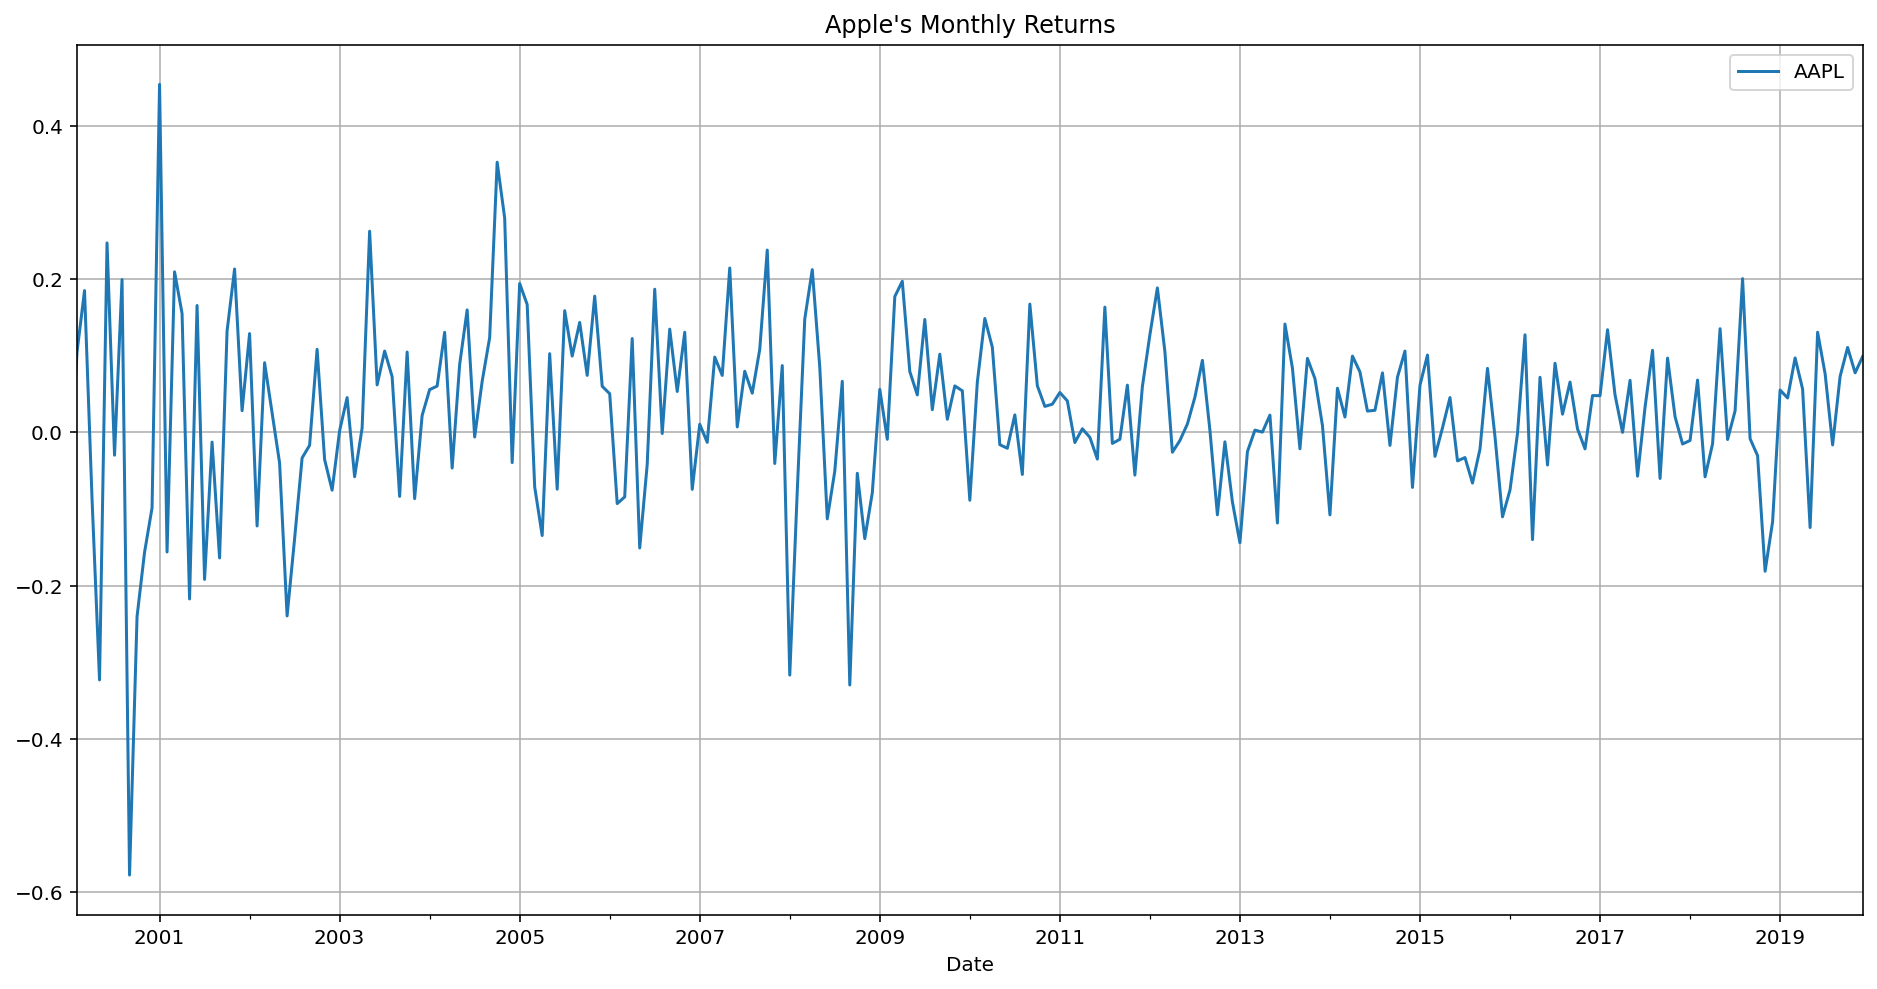

In [ ]:
data_mon.plot.line(y = 'AAPL', 
                   figsize = (16,8), grid = True,
                   title = "Apple's Monthly Returns",
                   xlim = (data_mon.index[1], data_mon.index[-1]));

In [ ]:
def q4(f1, d):
  count = 0
  for elem in f1:
    count += 1
    if count % 2 != 0:
      if elem not in d.keys():
        d[elem] = []
        d[elem].append(f1[count + 1])
      elif elem in d.keys():
        if f1[count + 1] not in d[elem]:
          d[elem].append(f1[count + 1])
      else:
        return -1
  return d

In [ ]:
def mystery_sort(lst: List[int]) -> List[int]:

    s1 = Stack()
    s2 = Stack()
    flag = True
    i = 0
    while i < len(lst):
        if flag and (s1.is_empty() or lst[i] > s1.peek()):
            s1.push(lst[i])
        else:
            flag = False
            s2.push(lst[i])
        i += 1
    res = []
    while not s2.is_empty():
        res.append(s2.pop())
    while not s1.is_empty():
        s2.push(s1.pop())
    while not s2.is_empty():
        res.append(s2.pop())
    return res

NameError: ignored

['hgfdfghjk', 'jpg']


In [ ]:
def raise_to_power(number, power):
  return number ** power

raise_to_power(5, 2)

25

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression


data = pd.read_excel("/content/attachment_5.xlsx")
data.head()

,district,treated,post,justicevotes,year
0,7,0,0,6.363300,2012
1,7,0,1,7.617789,2016
2,3,0,0,2.714932,2012
3,3,0,1,3.694069,2016
4,4,0,0,4.878048,2012


In [ ]:
post_treatment_data = data[data.year != 2012]
print("Post treated data\n", post_treatment_data.head())

pre_treatment_data = data[data.year == 2012]
print("Pre treated data\n", pre_treatment_data.head())

Post treated data
    district  treated  post  justicevotes  year
1         7        0     1      7.617789  2016
3         3        0     1      3.694069  2016
5         4        0     1      5.988024  2016
7         5        0     1      4.604597  2016
9         2        1     1      5.000000  2016
Pre treated data
    district  treated  post  justicevotes  year
0         7        0     0      6.363300  2012
2         3        0     0      2.714932  2012
4         4        0     0      4.878048  2012
6         5        0     0      3.159049  2012
8         2        1     0      3.278688  2012


In [ ]:
x = np.array(post_treatment_data["treated"]).reshape((-1, 1))
y = np.array(post_treatment_data["justicevotes"])

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
coeff = model.score(x, y)
print('Coefficient = ', coeff)

Coefficient =  0.13689861880363674


In [ ]:
print('Intercept:', model.intercept_)
print('Slope:', model.coef_)

Intercept: 5.6590965154761905
Slope: [2.74483818]


In [ ]:
treated_pre = pre_treatment_data[pre_treatment_data.treated == 1]
untreated_pre = pre_treatment_data[pre_treatment_data.treated == 0]

treated_post = post_treatment_data[post_treatment_data.treated == 1]
untreated_post = post_treatment_data[post_treatment_data.treated == 0]

In [ ]:
pre_treated_mean = sum(treated_pre["justicevotes"])/len(treated_pre["justicevotes"])
post_treated_mean = sum(treated_post["justicevotes"])/len(treated_post["justicevotes"])
print(pre_treated_mean, post_treated_mean)

5.0066365416666665 8.403934691666668


In [ ]:
pre_untreated_mean = sum(untreated_pre["justicevotes"])/len(untreated_pre["justicevotes"])
post_untreated_mean = sum(untreated_post["justicevotes"])/len(untreated_post["justicevotes"])
print(pre_untreated_mean, post_untreated_mean)

4.38536282857143 5.659096515476191
